In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Primero descargo un dataset de cara que contiene fotos para hacer reconocimiento facial, pero solo deja a las personas que tienen como minimo 60 imagenes. Luego imprime los nombres de las personas que tan en el dataset. Y luego me da el tamaño que tiene y son 1348 imagines, y de pixeles de 62x47.

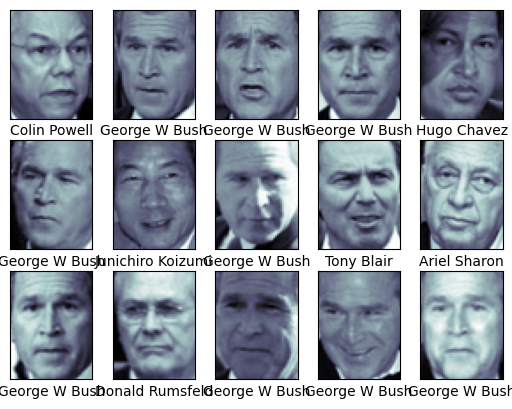

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

En este código hacemos 15 espacios para poner 15 imágenes. Y luego va seleccionando las imagenes en el orden de i. Y luego le pone el nombre debajo de cada imagen.

In [53]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Según mi investigación con PCA hacemos una reducción de dimensionalidad ya que tiene muchos píxeles.

Luego hacemos el modelo de support vertor classifier, y con kernel ='rbf' puede hacer separaciones no lineales.

Luego hace el modelo donde primero hace el PCA que es la reducción de dimensionalidad y luego SVC la clasificación.

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

Aquí hacemos el train y test, donde x_train, x_test son las caras y y_train,y_test son los nombres.

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 2min 18s, sys: 239 ms, total: 2min 18s
Wall time: 1min 35s
{'svc__C': 5, 'svc__gamma': 0.001}


Aquí no entendí tan bien, pero se definen las combinaciones de valores que queremos probar para el modelo:
C controla cuánto permite el modelo cometer errores.
Gamma controla la influencia de cada punto de datos.

En grid, hace todas las combinaciones posibles entre C y gamma.

%time mide cuanto tiempo tarda en ejecutarse y grid.fit entrena el modelo por cada combinación que hizo arriba.

Y nos imprime cual es el mejor de c y gamma.

In [6]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

model guarda la mejor combinación de hiperparámetros.

yfit es el resultado de la predicción con Xtest.

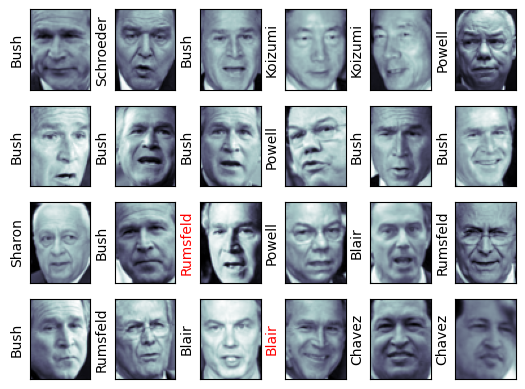

In [7]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

Aquí pone las imagenes del test y muestra el nombre que predijo el modelo, pero con el -1 es el apellido. Y si el yfit es igual a ytest lo pone el negro que es correcto y si no en rojo.

In [8]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Aquí se hace un infrome que muestra métricas:

donde nos da precision, recall y el f1-score es ambas y en support cuantas imagenes había de esa persona.

Accuracy de todo el modelo, tambien el promedio de precision y recall, finalmente el promedio ponderado.

<Axes: >

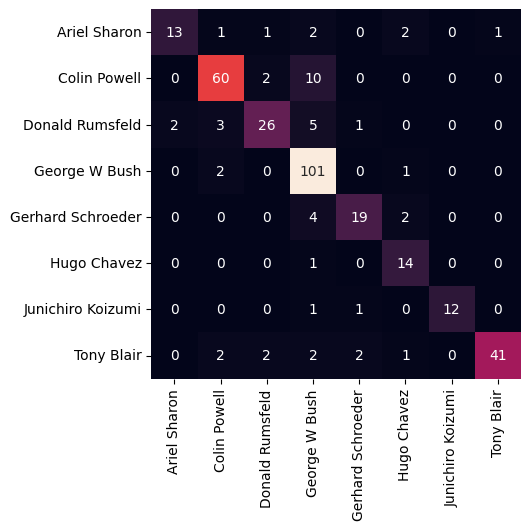

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

Hacemos una matriz de confusión. Hace una matriz de ytest valores reales y yfit los que predijo el modelo.

Transpone esa matriz y ya podemos ver cuando se equivoco con que persona y así.

Bibliografías:


scikit-learn developers. (n.d.). classification_report — scikit-learn 1.7.2 documentation. scikit-learn. Recuperado el 23 de octubre de 2025, de https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Scikit-learn

scikit-learn developers. (n.d.). ParameterGrid — scikit-learn 1.7.2 documentation. scikit-learn. Recuperado el 23 de octubre de 2025, de https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html

Scikit-learn

Amat Rodrigo, J. (2020, diciembre; actualizado 2025, agosto). PCA con Python. Ciencia de Datos. Recuperado el 23 de octubre de 2025, de https://cienciadedatos.net/documentos/py19-pca-python

In [35]:
from sklearn import datasets
df = datasets.load_digits()

In [39]:
print(df.target_names)
print(df.images.shape)

[0 1 2 3 4 5 6 7 8 9]
(1797, 8, 8)


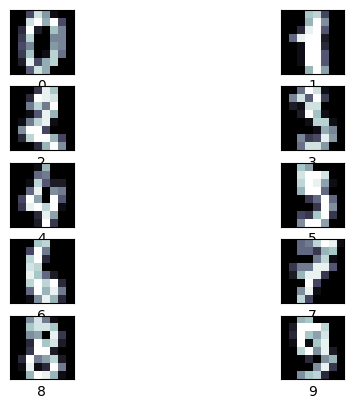

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(5, 2)
for i, axi in enumerate(ax.flat):
    axi.imshow(df.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=df.target_names[df.target[i]])

In [41]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df.data, df.target, random_state=42)

In [44]:
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline( svc)

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 6.23 s, sys: 5.16 ms, total: 6.24 s
Wall time: 6.28 s
{'svc__C': 1, 'svc__gamma': 0.001}


In [46]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

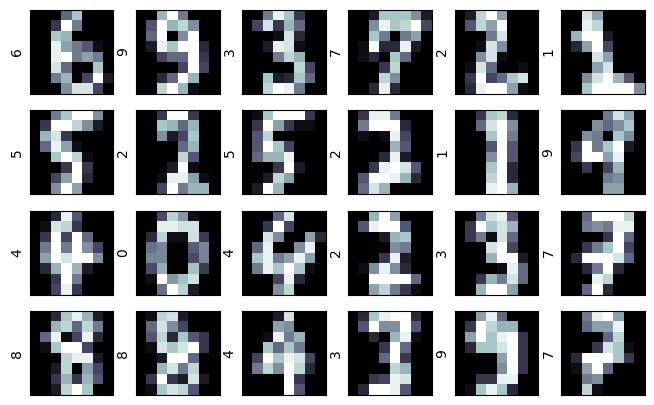

In [60]:
fig, ax = plt.subplots(4, 6,figsize=(8,5))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(8, 8), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(df.target_names[yfit[i]],
                   color='black' if yfit[i] == ytest[i] else 'red')

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=[str(name) for name in df.target_names]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       0.97      1.00      0.99        38
           9       0.98      0.96      0.97        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



<Axes: >

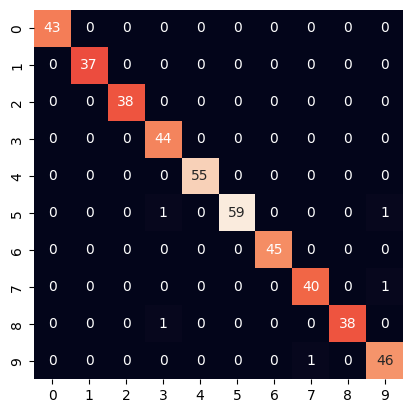

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df.target_names,
            yticklabels=df.target_names)

El modelo se ve muy fue raro el error que hubo, donde no le atino al número que le tenía que poner.

Este si lo pude hacer, estuvo fácil y me gustó la metodología que empleamos. Ya que fue más simple hacerlo después de ver un ejemplo.